# Chapter 4: Testing and regularization with Turi Create

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

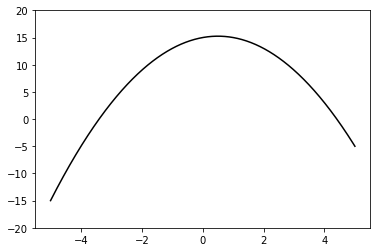

In [2]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [3]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)

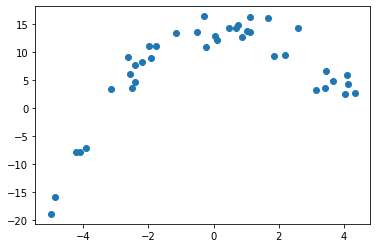

In [4]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

### Question 2a:

>**What is the polynomial that is being fit? How are the data points generated?**

A degree 2 polynomial.   
The data points are being randomly generated using a "for loop" this line of code reads as follows: 

X = []  
Y = []  
for i in range(40):  
    x = random.uniform(-5,5)  
    y = polynomial(coefs, x) + random.gauss(0,2)  
    X.append(x)  
    Y.append(y)
    
1. x-values are being generated randomly and appended by using a loop values between 5 and -5
2. y-values are being generated and appended by using the polynomial funcion using the _coefs_ list and adding a little bit of randomness by generating random values between 0-2 using the gaussian distribution.

## Training a polynomial regression model

In [5]:
import turicreate as tc

In [6]:
data = tc.SFrame({'x':X, 'y':Y})
data

x,y
3.4442185152504816,6.685961311021467
-2.4108324970703663,4.690236225597948
0.11274721368608542,12.205789026637378
-1.9668727392107255,11.133217991032268
-0.23403045847644144,10.927272159051856
0.046868558173902564,12.8584762866286
-2.1816215560029617,8.16012255928749
-2.4949365863755943,3.5061587527226514
4.097462559682402,5.933186396721837
4.021659504395828,2.454299054753137


### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [7]:
for i in range(2,200):
    string = 'x^'+str(i)
    data[string] = data['x'].apply(lambda x:x**i)
data

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 24)"

Note that increasing the degree of parallelism also increases the memory footprint.

x,y,x^2,x^3,x^4
3.4442185152504816,6.685961311021467,11.862641180794233,40.85752839466433,140.72225578427518
-2.4108324970703663,4.690236225597948,5.812113328930538,-14.012031690041567,33.78066134833202
0.11274721368608542,12.205789026637378,0.012711934193975809,0.0014332351609316464,0.00016159327095197139
-1.9668727392107255,11.133217991032268,3.8685883722503025,-7.609021008606714,14.965975993910245
-0.23403045847644144,10.927272159051856,0.05477025549469338,-0.012817908004294928,0.0029997808869539904
0.046868558173902564,12.8584762866286,0.002196661745300489,0.0001029543687980023,4.82532282326659e-06
-2.1816215560029617,8.16012255928749,4.759472613616784,-10.38336804907213,22.652579559768178
-2.4949365863755943,3.5061587527226514,6.224708570035504,-15.530253150907287,38.74699678187344
4.097462559682402,5.933186396721837,16.789199427999062,68.79311606326735,281.877217433124
4.021659504395828,2.454299054753137,16.173745169297295,65.04529598178058,261.5900328013676


### Question 2b:

>**How many rows and columns are there in data when it is split into training and testing sets?**

40 rows  
200 columns

## Splitting data into training and testing

In [8]:
train, test = data.random_split(.8, seed=0)

### Question 2c:

>**What percentage of the data is used in training? What is the remaining data used for?**

80% of the data is being used for training.  
The remaining 20% is being used for testing

In [9]:
def display_results(model):
    coefs = model.coefficients
    print("Training error (rmse):", model.evaluate(train)['rmse'])
    print("Testing error (rmse):", model.evaluate(test)['rmse'])
    plt.scatter(train['x'], train['y'], marker='o')
    plt.scatter(test['x'], test['y'], marker='^')
    draw_polynomial(coefs['value'])
    plt.show()
    print("Polynomial coefficients")
    print(coefs['name', 'value'])

## Training a polynomial regression model with no regularization

In [10]:
model_no_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.0, l2_penalty=0.0, verbose=False, validation_set=None)

Training error (rmse): 0.8922190972578341
Testing error (rmse): 167.54695268058086


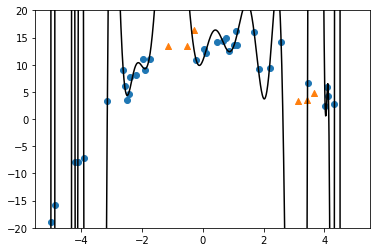

Polynomial coefficients
+-------------+---------------------+
|     name    |        value        |
+-------------+---------------------+
| (intercept) |  10.726075697224587 |
|      x      |  14.029088016982424 |
|     x^2     |   43.8655474194552  |
|     x^3     | -121.39795401084199 |
|     x^4     | -18.987048968225718 |
|     x^5     |  134.8806967297538  |
|     x^6     |  -2.97082851456022  |
|     x^7     |  -61.65259496090729 |
|     x^8     |  2.5920932785822117 |
|     x^9     |  13.984823601954021 |
+-------------+---------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [11]:
display_results(model_no_reg)

### Question 2d:

>**Compare the training and testing error of model_no_reg. Comment on what this implies in terms of overfitting and/or underfitting.**

Testing error is significantly larger compared to the training error, which means the model is overfitting the data. 

## Training a polynomial regression model with L1 regularization

In [12]:
model_L1_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.1, l2_penalty=0.0, verbose=False, validation_set=None)

Training error (rmse): 9.473874911154354
Testing error (rmse): 10.077027617091746


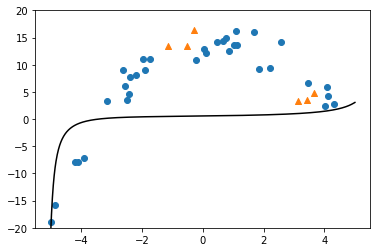

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    0.5655798426406279   |
|      x      |    0.0694081636504658   |
|     x^2     |   0.007552836827385346  |
|     x^3     |  0.0039472372695802714  |
|     x^4     | -0.00021279451431743305 |
|     x^5     |  0.00019048017792383455 |
|     x^6     | -1.7985140462517327e-05 |
|     x^7     |  7.880814935063952e-06  |
|     x^8     |  -8.895545466589718e-07 |
|     x^9     |  3.020651102542037e-07  |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [13]:
display_results(model_L1_reg)

### Question 2e:

>**Compare the training and testing error of model_L1_reg. Comment on what this implies in terms of overfitting and/or underfitting.**

The results in this model, both training and testing error are very close to each other, however these seem to be a little to high for this data set. Thus, these results are still not appropiate because this model is underfitting.

## Training a polynomial regression model with L2 regularization

In [14]:
model_L2_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.0, l2_penalty=0.1, verbose=False, validation_set=None)

Training error (rmse): 1.714673638689724
Testing error (rmse): 3.4136157972105874


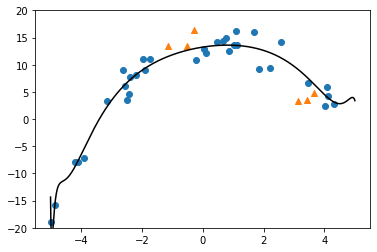

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    13.242877632262719   |
|      x      |    0.874232727612887    |
|     x^2     |   -0.5194425440520338   |
|     x^3     |   0.006007308646500654  |
|     x^4     |   -0.0216116996696464   |
|     x^5     |  0.0011472313840806448  |
|     x^6     |  -0.0003956823926609362 |
|     x^7     |  3.5375598730705036e-05 |
|     x^8     | -1.0652607278143978e-07 |
|     x^9     |  5.825198471939327e-07  |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [15]:
display_results(model_L2_reg)

### Question 2f:

>**Compare the training and testing error of model_L2_reg. Comment on what this implies in terms of overfitting and/or underfitting.**

Both testing and training errors are low. Thus, this model is neither underfitting nor overfitting, is a good model.

## Viewing the predictions in the testing set

In [16]:
predictions = test['x', 'y']
predictions['No reg'] = model_no_reg.predict(test)
predictions['L1 reg'] = model_L1_reg.predict(test)
predictions['L2 reg'] = model_L2_reg.predict(test)

In [17]:
predictions

x,y,No reg,L1 reg,L2 reg
-0.2785728454728664,16.36505651355184,12.512397672729527,0.5467437924583819,12.958767791803536
3.6530992777164,4.83366913200435,301.15847780538024,1.2303202834642821,6.4503933519979455
-0.5203042856442961,13.47860807272069,26.41948011459865,0.5309318651483862,12.644906915280387
3.14466863291336,3.2664703661537313,-275.7673739275697,1.0254405801644777,9.082077532784393
-1.1509885402733957,13.436894195835206,53.8543920692714,0.48885372921707754,11.498079646733487
3.424602231401824,3.5269925176080537,-27.258171684468834,1.1270992482748206,7.701281752205814


### Question 2g:

>**Considering training and testing error, the scatter plots and the list of predictions, discuss which of the three models you would recommend.**

These are the findings for each model: 
* No reg - Overfitting
    * Large testing error and small training error
    * Scatter plot: At first glance, the model did a good job fitting the    training data, but not so good job when fitting the testing data points as these present a large vertical distance to the line. Hence, its results in the training and testing errors
    * Predictions: y-values are significantly different to the predictions made by the model. Additionally, it presents large coefficients, meaning the polymomial is not good for making predictions.
   
   
* L1 reg - Underfitting
    * Both large testing and training errors
    * When observing the scatter plot, there's a significant distance between the line and the training and testing data points 
    * Predictions: y-values are significantly different to the predictions made by the model.The coeffients appear to be quite constant and in some instances close to zero. Hence, the polynomial looks like an horizontal line. Therefore, this model is not good for prediction.
    
    
* L2 reg - Good Model
    * Both small testing and training errors
    * Small distances between the data points and the line
    * Predictions: The predicted values are fairly close to y, almost exact in some instances, therefore we can say that the model performed well. The coeffiencients are not too large nor too small. This is balanced model to make predictions. 
    
**CONCLUSION:**  
The model that I would recommend is **L2 reg** since this one presents the best results for the given data set. 